In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

import os
import zipfile
import shutil
import cv2
import glob

In [ ]:
try:
  cnn = load_model('/content/cifar10_accuracy_82v1.h5')
  cnn.summary()
  print('model is succesfully downloaded!!')

except Exception as err:
  print(err)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [ ]:
import os

target_root_dir = 'pred_result'

if not os.path.exists(target_root_dir):
  os.mkdir(target_root_dir)
  print(target_root_dir + 'is created !!!')

pred_resultis created !!!


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(len(class_names)):

  label_dir = target_root_dir + '/' + str(class_names[i]).strip()

  if not os.path.exists(label_dir):
    os.mkdir(label_dir)
    print(label_dir + ' is created !!')

pred_result/airplane is created !!
pred_result/automobile is created !!
pred_result/bird is created !!
pred_result/cat is created !!
pred_result/deer is created !!
pred_result/dog is created !!
pred_result/frog is created !!
pred_result/horse is created !!
pred_result/ship is created !!
pred_result/truck is created !!


In [ ]:
unknown_dir = target_root_dir + '/unknown/'

if not os.path.exists(unknown_dir):
  os.mkdir(unknown_dir)
  print(unknown_dir + 'is created!!')

pred_result/unknown/is created!!


In [ ]:
import zipfile

with zipfile.ZipFile('./my_test_image.zip', 'r') as target_file:

  target_file.extractall('my_test_image')

  print("test image is extracted in to my_test_image dir !!!")

test image is extracted in to my_test_image dir !!!


In [ ]:
import glob

test_image_data_list = glob.glob('my_test_image/*/*')

print(test_image_data_list)

['my_test_image/automobile/automobile.1.jpg', 'my_test_image/airplane/airplane.1.jpg', 'my_test_image/horse/horse.1.jpg', 'my_test_image/ship/ship.1.jpg', 'my_test_image/deer/deer.1.jpg', 'my_test_image/dog/dog.1.png', 'my_test_image/frog/frog.1.jpg', 'my_test_image/truck/truck.1.jpg', 'my_test_image/cat/cat.1.jpg', 'my_test_image/cat/cat.2.jpg']


In [ ]:
label_list = []
for index in range(len(test_image_data_list)):

  label_list.append(test_image_data_list[index].split('/')[1].strip())

print(label_list)

['automobile', 'airplane', 'horse', 'ship', 'deer', 'dog', 'frog', 'truck', 'cat', 'cat']


In [ ]:
import cv2
import glob

src_img_list = []
dst_img_list = []

img_file_list = glob.glob('my_test_image/*/*')

print(img_file_list)

for i in range(len(img_file_list)):

  src_img = cv2.imread(img_file_list[i], cv2.IMREAD_COLOR)
  dst_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)
  dst_img = cv2.resize(dst_img, (32, 32))
  dst_img = dst_img / 255.0

  print('%d-th image shape => '% (i+1), src_img.shape, dst_img.shape)

  src_img_list.append(src_img)
  dst_img_list.append(dst_img)


['my_test_image/automobile/automobile.1.jpg', 'my_test_image/airplane/airplane.1.jpg', 'my_test_image/horse/horse.1.jpg', 'my_test_image/ship/ship.1.jpg', 'my_test_image/deer/deer.1.jpg', 'my_test_image/dog/dog.1.png', 'my_test_image/frog/frog.1.jpg', 'my_test_image/truck/truck.1.jpg', 'my_test_image/cat/cat.1.jpg', 'my_test_image/cat/cat.2.jpg']
1-th image shape =>  (199, 254, 3) (32, 32, 3)
2-th image shape =>  (576, 1024, 3) (32, 32, 3)
3-th image shape =>  (168, 300, 3) (32, 32, 3)
4-th image shape =>  (168, 299, 3) (32, 32, 3)
5-th image shape =>  (196, 258, 3) (32, 32, 3)
6-th image shape =>  (510, 525, 3) (32, 32, 3)
7-th image shape =>  (190, 265, 3) (32, 32, 3)
8-th image shape =>  (900, 1200, 3) (32, 32, 3)
9-th image shape =>  (640, 960, 3) (32, 32, 3)
10-th image shape =>  (425, 320, 3) (32, 32, 3)


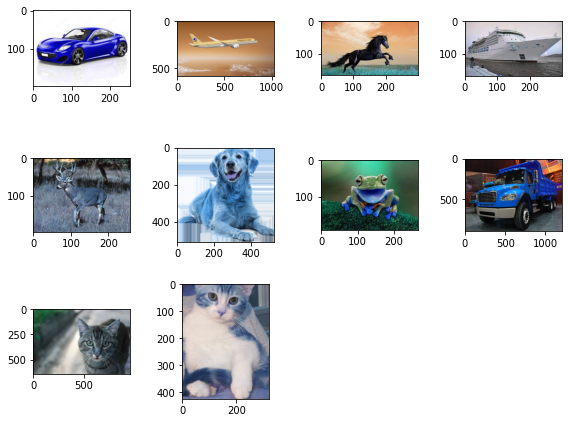

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize = (8, 8))

for i in range(len(src_img_list)):
  plt.subplot(4, 4, i+1)
  plt.imshow(src_img_list[i])

plt.tight_layout()
plt.show()

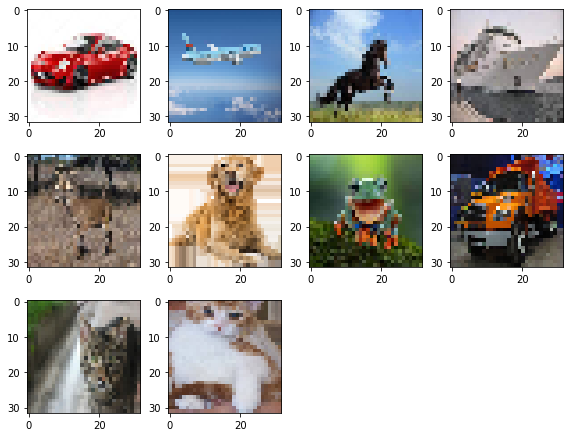

In [ ]:
plt.figure(figsize = (8, 8))

for i in range(len(dst_img_list)):
  plt.subplot(4, 4, i+1)
  plt.imshow(dst_img_list[i])

plt.tight_layout()
plt.show()

In [ ]:
dst_img_array = np.array(dst_img_list)

print(dst_img_array.shape)

(10, 32, 32, 3)


In [ ]:
class_names = ['aiplane', 'automobile', 'bir', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
pred = cnn.predict(dst_img_array)

print(pred.shape)

(10, 10)


In [ ]:
for index in range(len(pred)):

  class_index = np.argmax(pred[index])
  print('prediction => ', class_names[class_index], pred[index].max(), ', label =', label_list[index])

prediction =>  truck 0.50861996 , label = automobile
prediction =>  aiplane 0.99951756 , label = airplane
prediction =>  bir 0.44065484 , label = horse
prediction =>  ship 0.9960563 , label = ship
prediction =>  frog 0.8590545 , label = deer
prediction =>  dog 0.49567932 , label = dog
prediction =>  frog 0.97000724 , label = frog
prediction =>  truck 0.55893034 , label = truck
prediction =>  cat 0.8946541 , label = cat
prediction =>  cat 0.38814557 , label = cat


In [28]:
top3 = 3

for index in range(len(pred)):

  sorted_index = pred[index].argsort()
  sorted_index = sorted_index[::-1]

  print('=' * 30)
  print(sorted_index)

  for j in range(top3):
    
    print('prediction => ', class_names[sorted_index[j]], pred[index, sorted_index[j])

SyntaxError: ignored

In [ ]:
import shutil

for index in range(len(pred)):

  class_index = np.argmax(pred[index])
  print('prediction => ', class_names[class_index], pred[index].max())

  if pred[index].max() >= 0.5:
    
    target_dir = target_root_dir + '/' + class_names[class_index].strip()
    shutil.copy(img_file_list[index], target_dir)
    file_name = img_file_list[index].split('/')[2].strip()

  else:
    target